# Decision Trees - Heart Disease Classification

**Students:** Album #103569, #103512  
**Dataset:** Heart Disease (Cleveland)  
**Source:** UCI Machine Learning Repository  

---

## Table of Contents
1. [Data Loading and Understanding](#1-data-loading)
2. [Exploratory Data Analysis (EDA)](#2-eda)
3. [Data Preprocessing](#3-preprocessing)
4. [Decision Tree Model](#4-model)
5. [Evaluation](#5-evaluation)
6. [Visualization](#6-visualization)
7. [Conclusions](#7-conclusions)

---
## 1. Data Loading and Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Define column names based on UCI repository documentation
column_names = [
    'age',           # age in years
    'sex',           # sex (1 = male; 0 = female)
    'cp',            # chest pain type (1-4)
    'trestbps',      # resting blood pressure (mm Hg)
    'chol',          # serum cholesterol (mg/dl)
    'fbs',           # fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',       # resting ECG results (0-2)
    'thalach',       # maximum heart rate achieved
    'exang',         # exercise induced angina (1 = yes; 0 = no)
    'oldpeak',       # ST depression induced by exercise
    'slope',         # slope of peak exercise ST segment (1-3)
    'ca',            # number of major vessels colored by fluoroscopy (0-3)
    'thal',          # thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    'target'         # diagnosis (0 = no disease; 1,2,3,4 = disease)
]

# Load data
df = pd.read_csv('data/heart_disease.csv', names=column_names, na_values='?')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (303, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Dataset information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
# Convert target to binary (0 = no disease, 1 = disease)
# Original: 0 = no disease, 1-4 = presence of disease
df['target'] = (df['target'] > 0).astype(int)

print("Target distribution after conversion:")
print(df['target'].value_counts())
print(f"\nClass balance: {df['target'].value_counts(normalize=True)*100}")

Target distribution after conversion:
target
0    164
1    139
Name: count, dtype: int64

Class balance: target
0    54.125413
1    45.874587
Name: proportion, dtype: float64


---
## 2. Exploratory Data Analysis (EDA)

### 2.1 Missing Values

Missing Values:
      Missing Count  Percentage
ca                4    1.320132
thal              2    0.660066


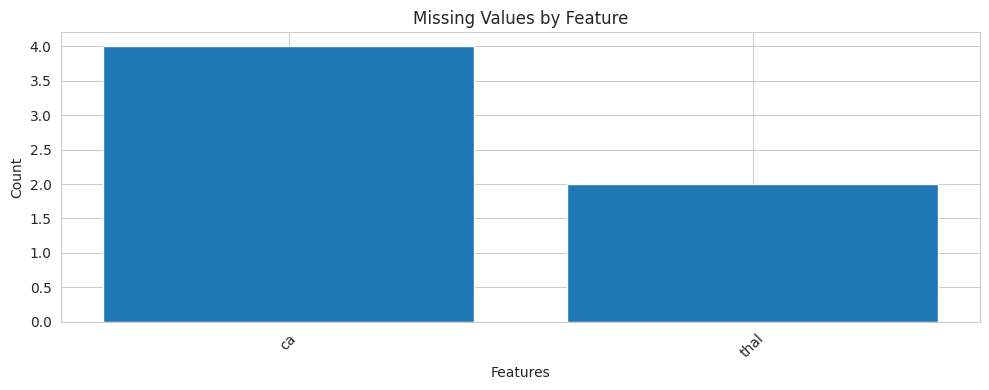

In [5]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("Missing Values:")
print(missing_df)

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(10, 4))
    plt.bar(missing_df.index, missing_df['Missing Count'])
    plt.title('Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo missing values found!")

### 2.2 Statistical Summary

In [6]:
# Statistical summary
print("Statistical Summary:")
print("="*80)
df.describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### 2.3 Distribution Analysis

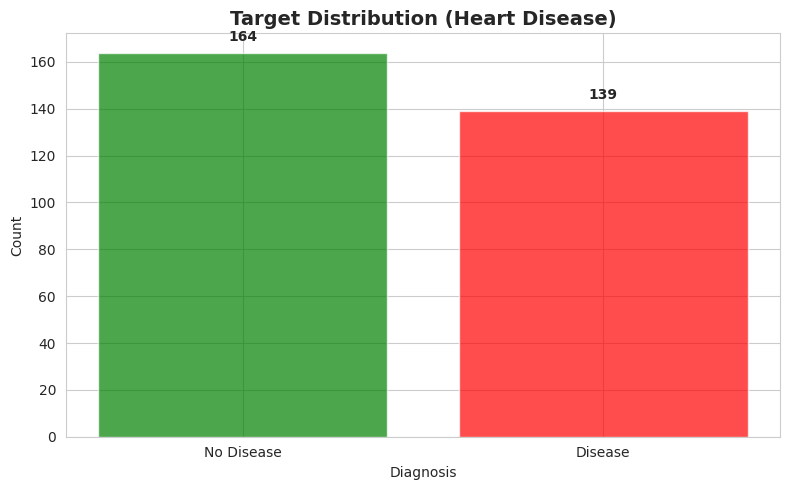

Class Balance: 0.85


In [7]:
# Target distribution
plt.figure(figsize=(8, 5))
target_counts = df['target'].value_counts()
plt.bar(['No Disease', 'Disease'], target_counts.values, color=['green', 'red'], alpha=0.7)
plt.title('Target Distribution (Heart Disease)', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Diagnosis')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"Class Balance: {target_counts[1]/target_counts[0]:.2f}")

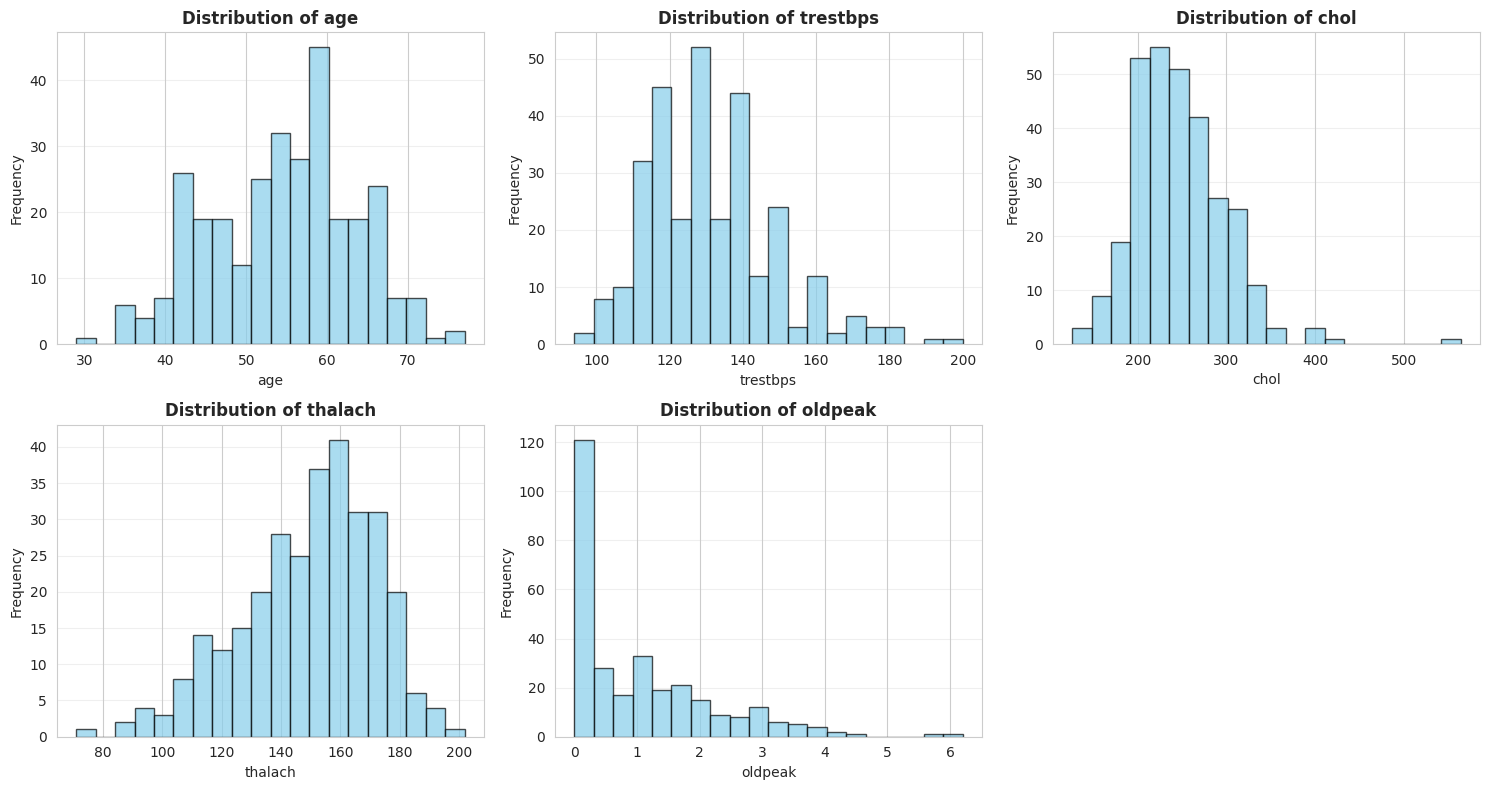

In [8]:
# Distribution of numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

# Hide the last subplot if empty
axes[-1].axis('off')

plt.tight_layout()
plt.show()

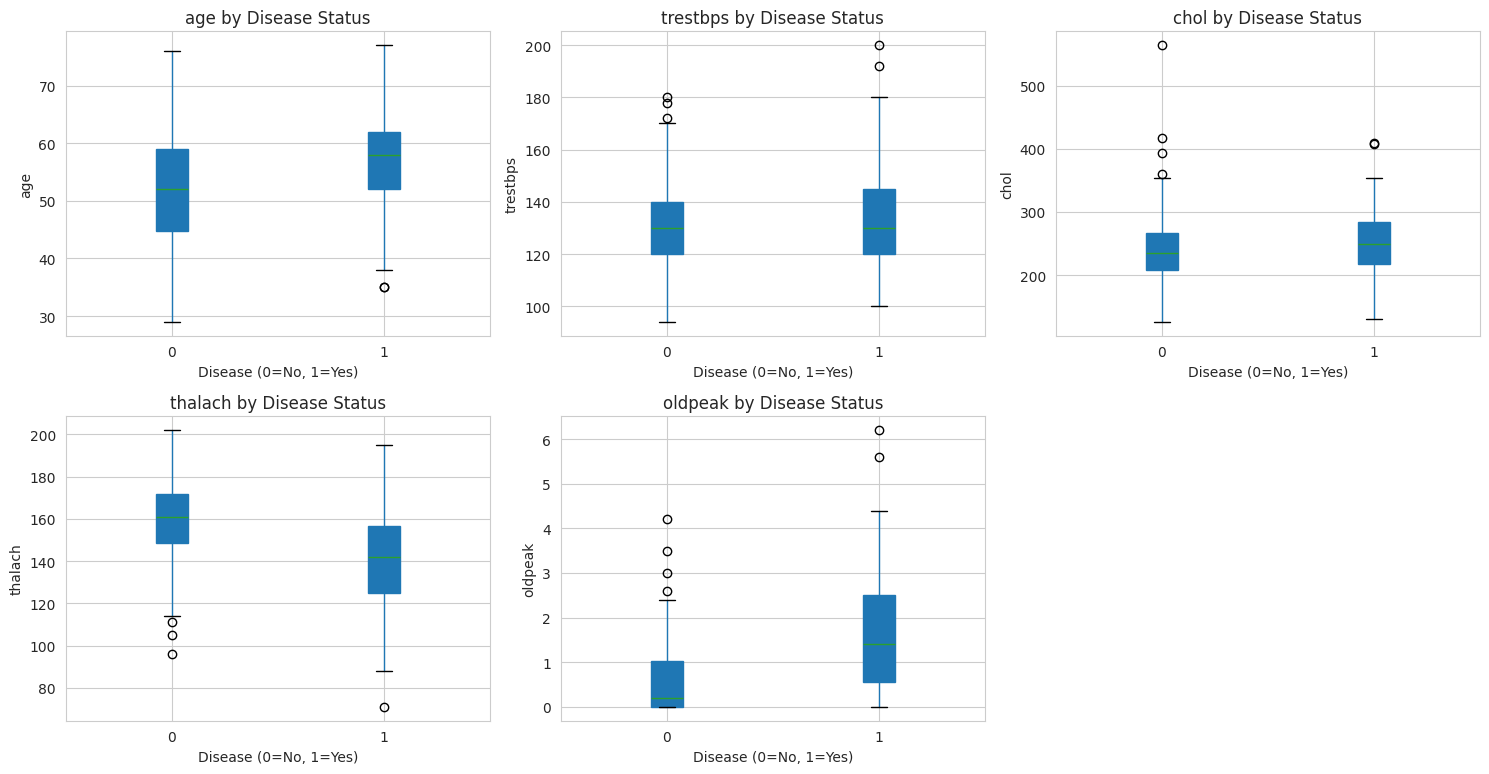

In [9]:
# Box plots for numerical features by target
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='target', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{col} by Disease Status')
    axes[idx].set_xlabel('Disease (0=No, 1=Yes)')
    axes[idx].set_ylabel(col)

axes[-1].axis('off')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

### 2.4 Correlation Analysis

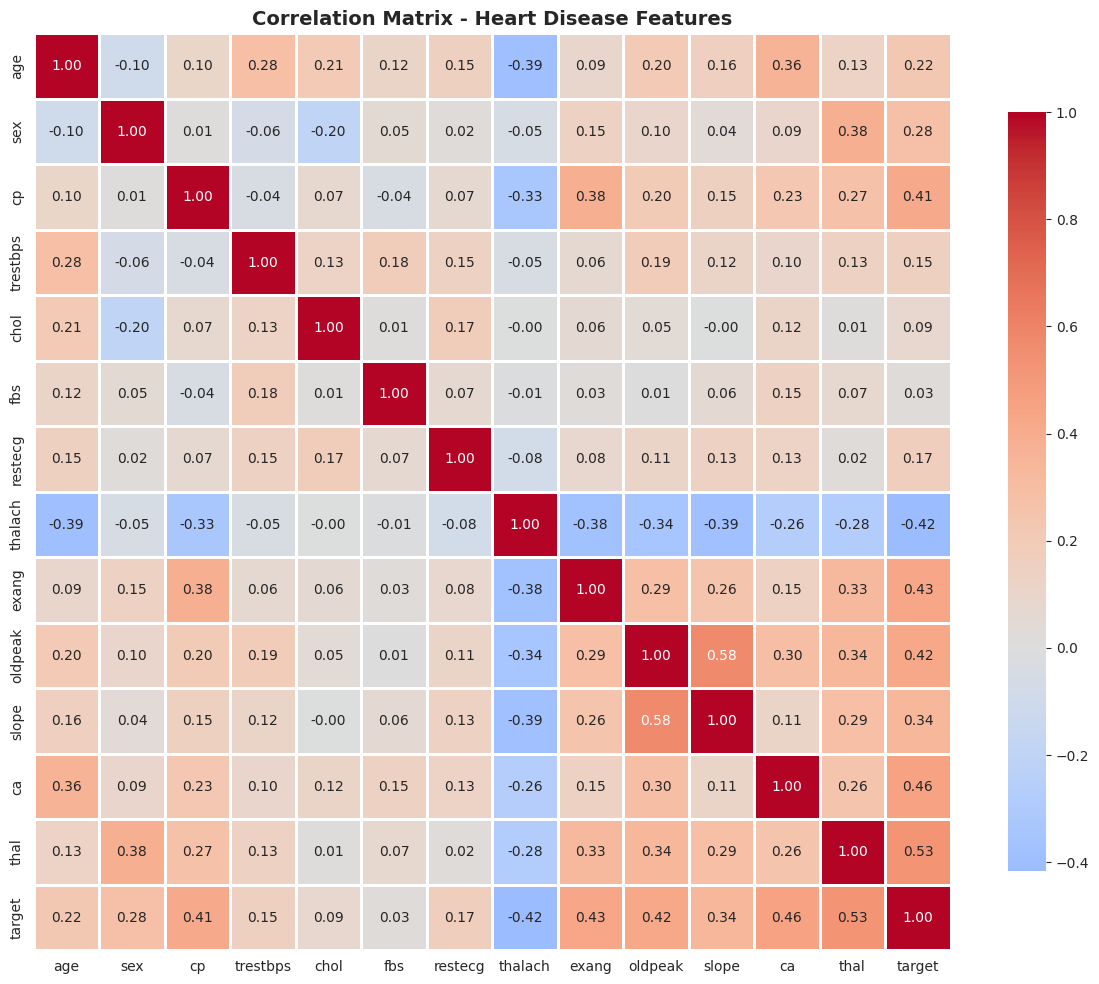

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Heart Disease Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Correlation with Target (Heart Disease):
target      1.000000
thal        0.525689
ca          0.460442
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


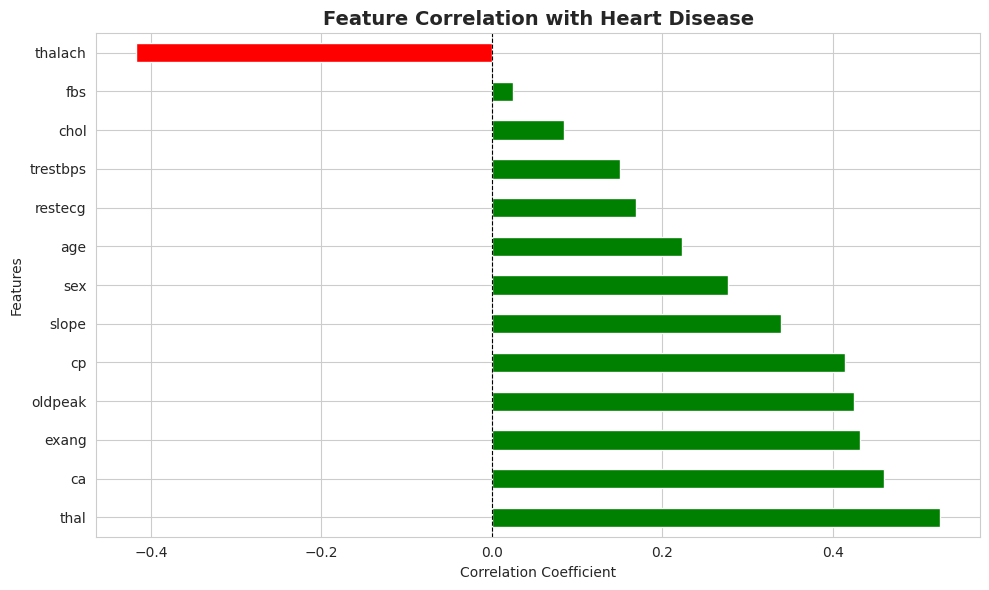

In [11]:
# Correlation with target
target_corr = correlation['target'].sort_values(ascending=False)
print("Correlation with Target (Heart Disease):")
print("="*50)
print(target_corr)

# Visualize
plt.figure(figsize=(10, 6))
target_corr[1:].plot(kind='barh', color=['red' if x < 0 else 'green' for x in target_corr[1:]])
plt.title('Feature Correlation with Heart Disease', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

### 2.5 Categorical Features Analysis

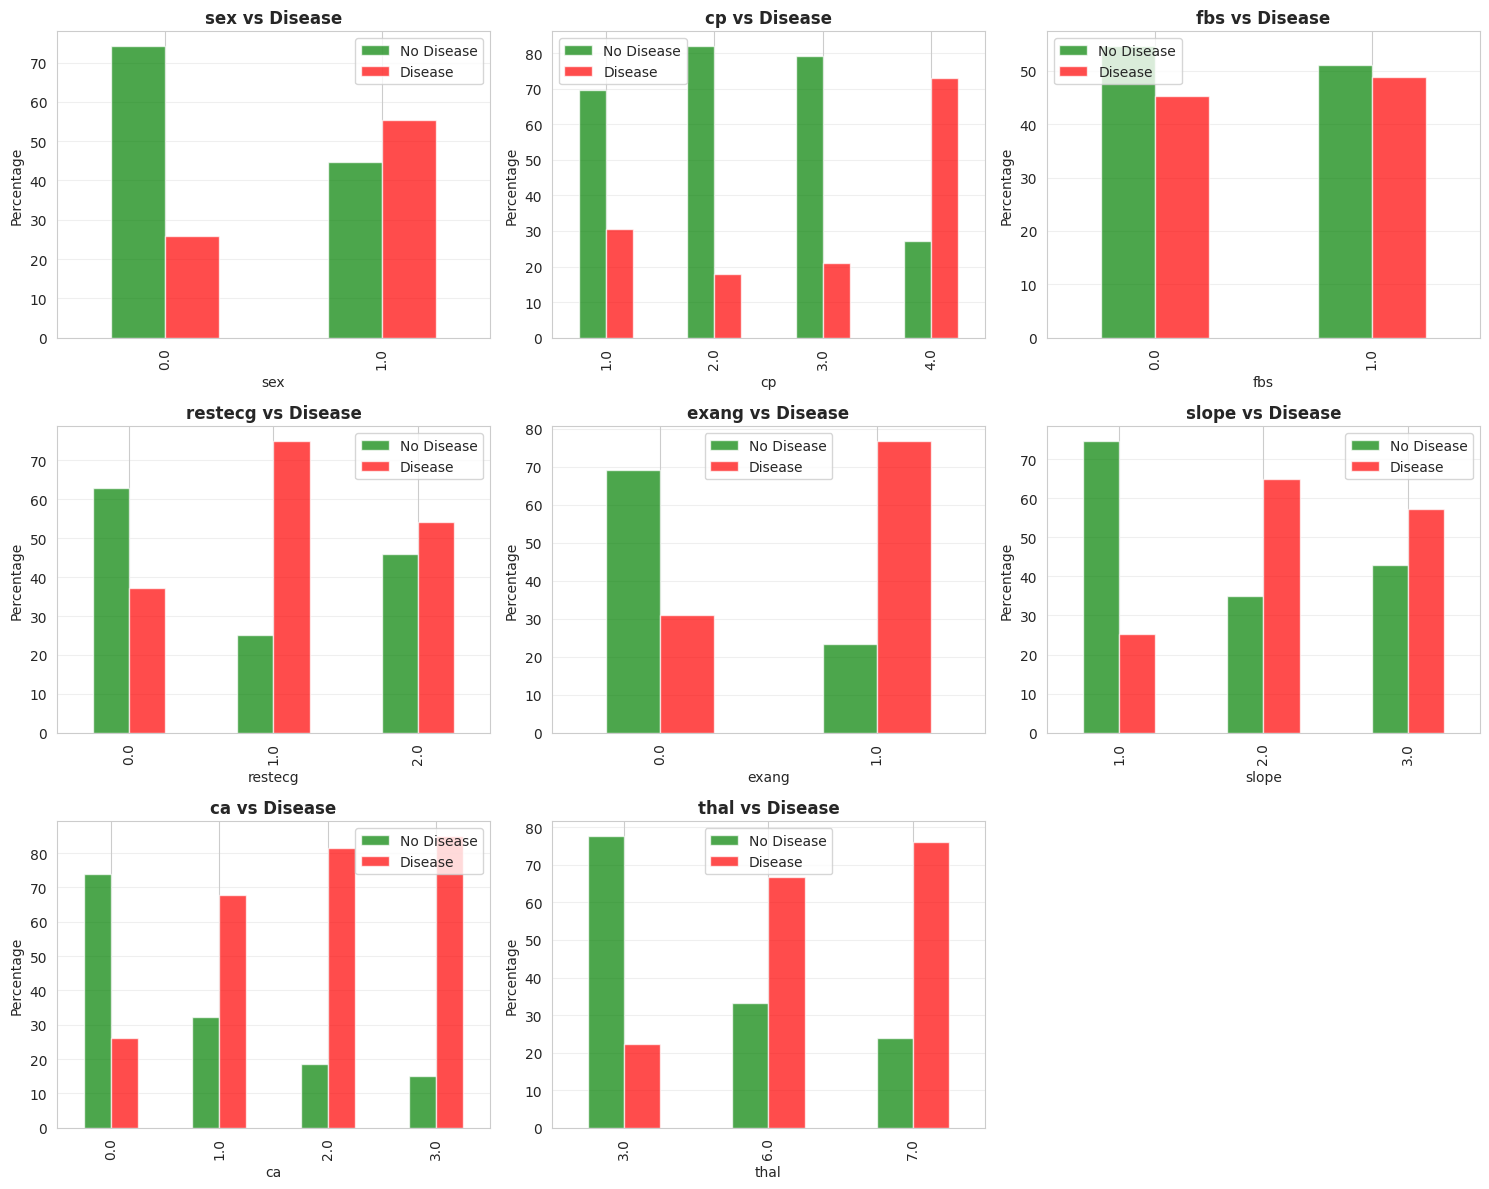

In [12]:
# Categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Create crosstab
    ct = pd.crosstab(df[col], df['target'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=['green', 'red'], alpha=0.7)
    axes[idx].set_title(f'{col} vs Disease', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage')
    axes[idx].legend(['No Disease', 'Disease'])
    axes[idx].grid(axis='y', alpha=0.3)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

---
## 3. Data Preprocessing

In [13]:
# Handle missing values (drop rows with missing values)
df_clean = df.dropna()
print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")
print(f"Rows removed: {len(df) - len(df_clean)}")

Original dataset size: 303
Clean dataset size: 297
Rows removed: 6


In [14]:
# Separate features and target
X = df_clean.drop('target', axis=1)
y = df_clean['target']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(list(X.columns))

Features shape: (297, 13)
Target shape: (297,)

Feature names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [15]:
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: (237, 13)
Testing set size: (60, 13)

Training set target distribution:
target
0    128
1    109
Name: count, dtype: int64

Testing set target distribution:
target
0    32
1    28
Name: count, dtype: int64


---
## 4. Decision Tree Model

In [16]:
# Train decision tree with max_depth=3
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print("Decision Tree Model trained successfully!")
print(f"Tree depth: {clf.get_depth()}")
print(f"Number of leaves: {clf.get_n_leaves()}")

Decision Tree Model trained successfully!
Tree depth: 3
Number of leaves: 8


---
## 5. Evaluation

In [17]:
# Make predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Model Performance:")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Model Performance:
Training Accuracy: 0.8439 (84.39%)
Testing Accuracy: 0.8000 (80.00%)


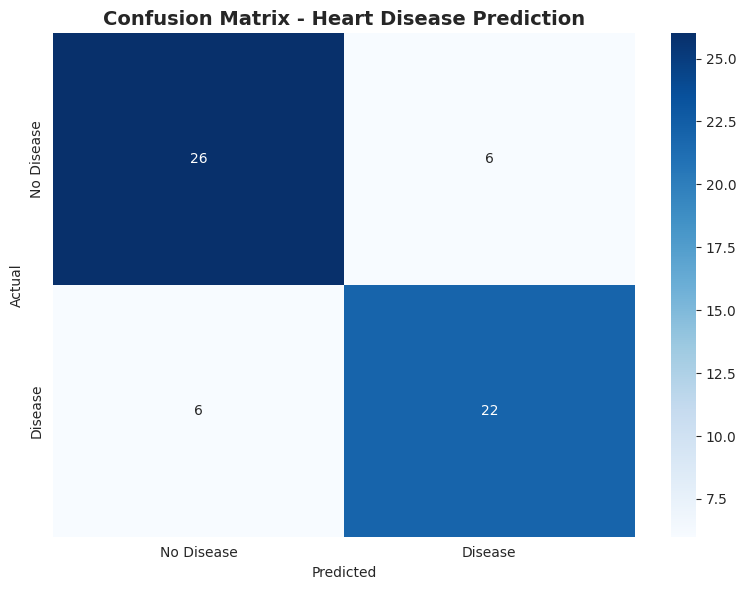


Confusion Matrix:
[[26  6]
 [ 6 22]]


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Heart Disease Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)

In [19]:
# Classification Report
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Disease', 'Disease']))

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.81      0.81      0.81        32
     Disease       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



Feature Importance:
     feature  importance
12      thal    0.493895
2         cp    0.272029
9    oldpeak    0.105996
11        ca    0.079177
4       chol    0.048903
3   trestbps    0.000000
1        sex    0.000000
0        age    0.000000
5        fbs    0.000000
8      exang    0.000000
7    thalach    0.000000
6    restecg    0.000000
10     slope    0.000000


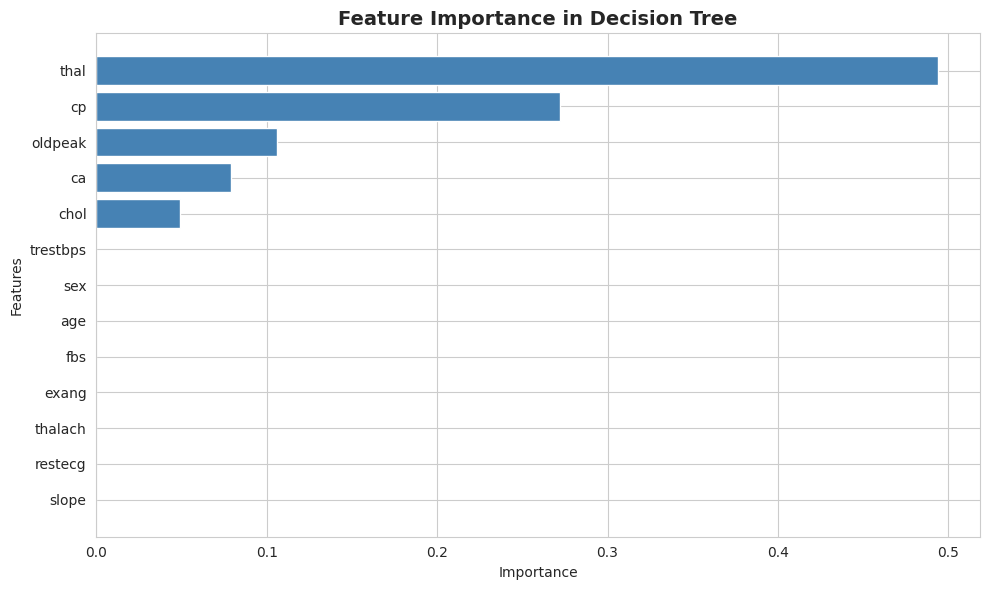

In [20]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print("="*50)
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 5.1 Testing Different max_depth Values

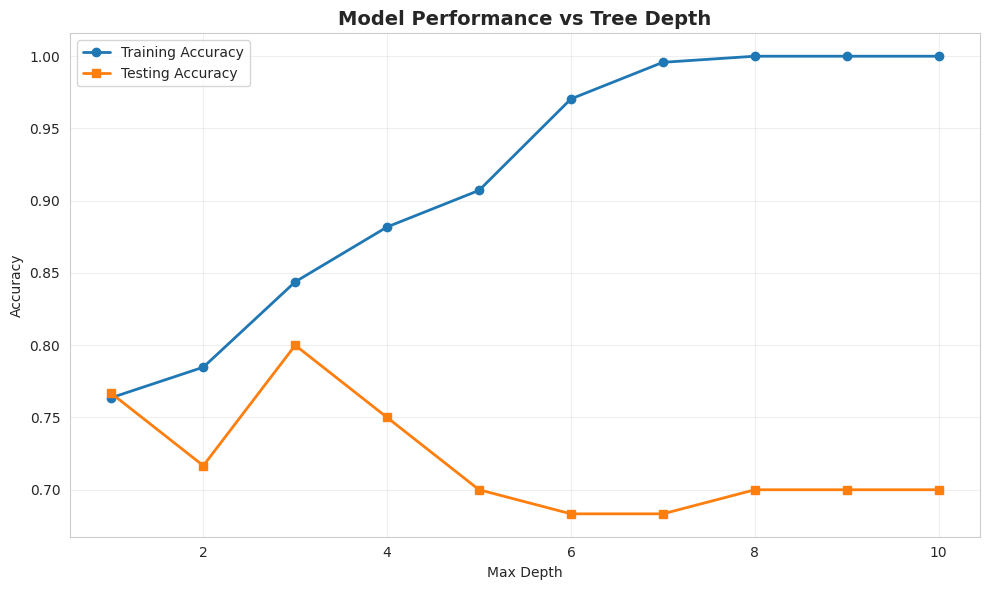


Best max_depth: 3
Best test accuracy: 0.8000


In [21]:
# Test different max_depth values to avoid overfitting
depths = range(1, 11)
train_scores = []
test_scores = []

for depth in depths:
    clf_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_temp.fit(X_train, y_train)
    
    train_scores.append(clf_temp.score(X_train, y_train))
    test_scores.append(clf_temp.score(X_test, y_test))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(depths, test_scores, marker='s', label='Testing Accuracy', linewidth=2)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Tree Depth', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Find best depth
best_depth = depths[np.argmax(test_scores)]
print(f"\nBest max_depth: {best_depth}")
print(f"Best test accuracy: {max(test_scores):.4f}")

---
## 6. Visualization

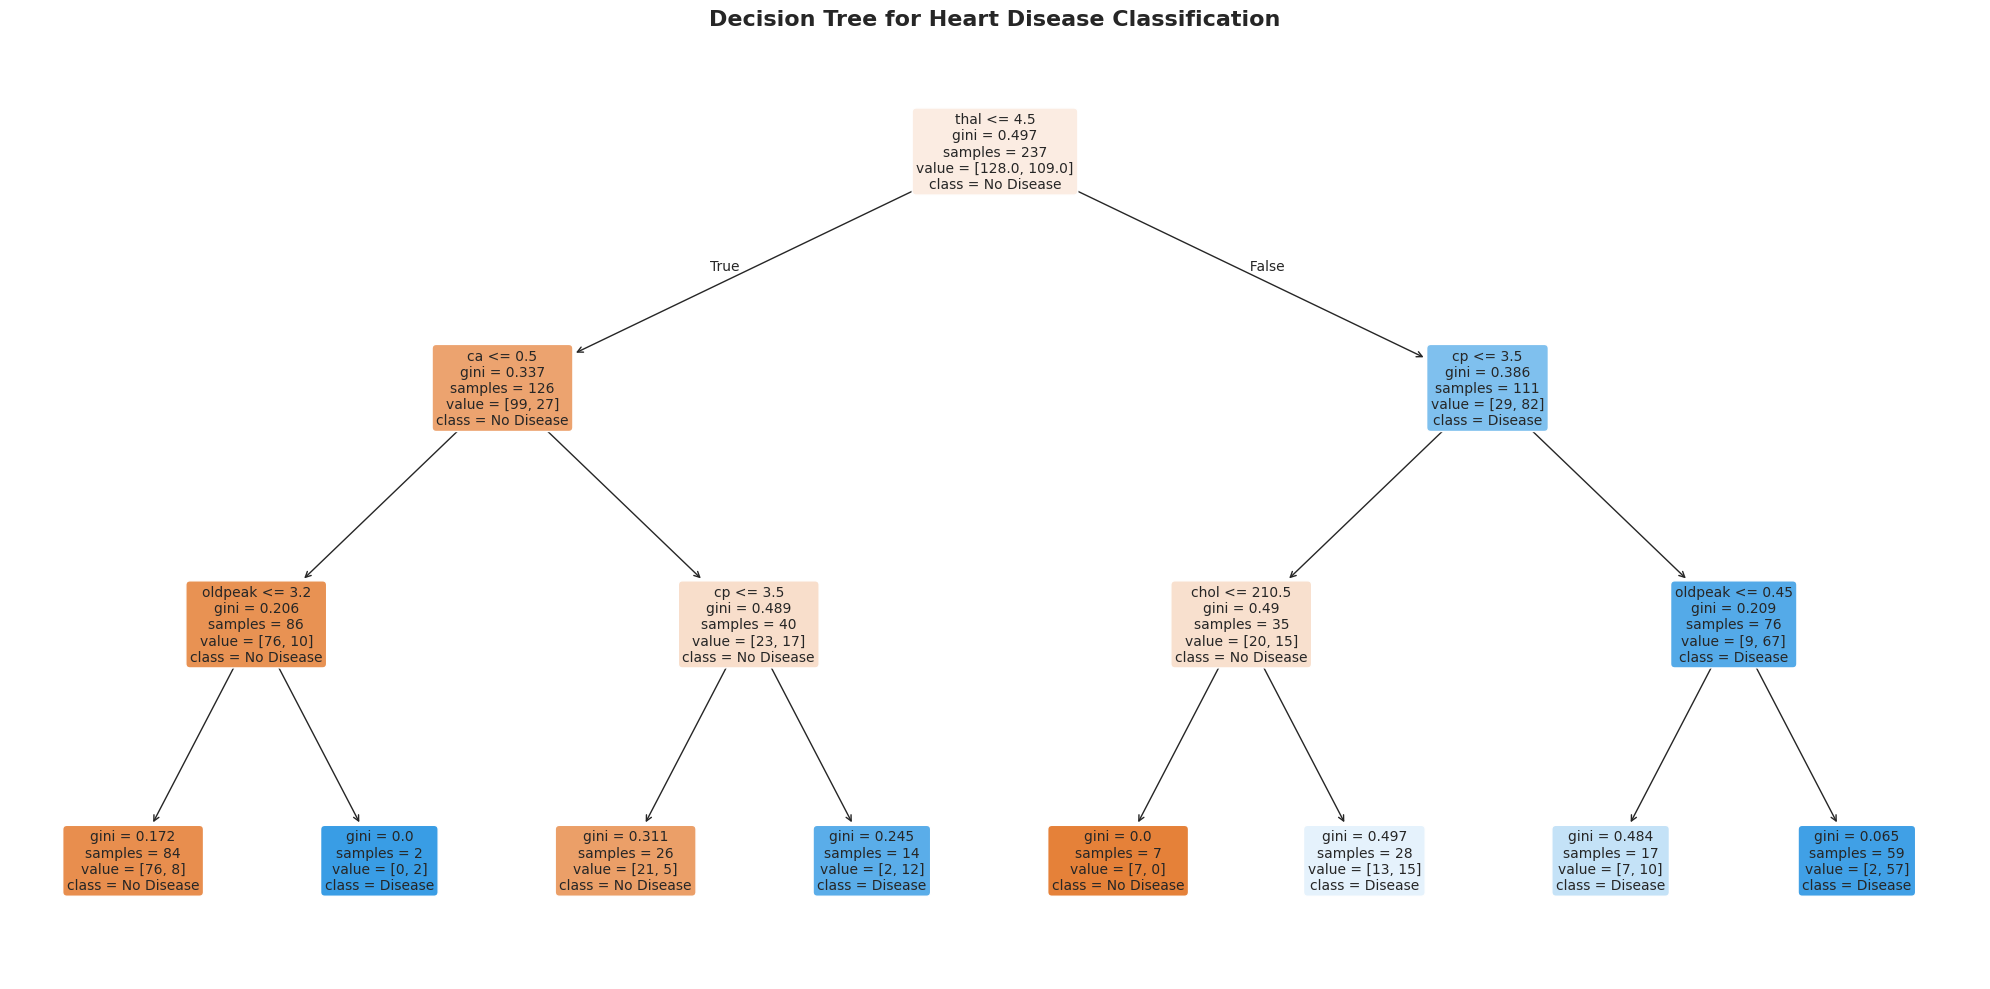

Tree visualization saved as 'tree_visualization.png'


In [22]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               feature_names=X.columns,
               class_names=['No Disease', 'Disease'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree for Heart Disease Classification', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Tree visualization saved as 'tree_visualization.png'")

In [23]:
# Alternative: Export tree structure as text
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print("="*60)
print(tree_rules)

Decision Tree Rules:
|--- thal <= 4.50
|   |--- ca <= 0.50
|   |   |--- oldpeak <= 3.20
|   |   |   |--- class: 0
|   |   |--- oldpeak >  3.20
|   |   |   |--- class: 1
|   |--- ca >  0.50
|   |   |--- cp <= 3.50
|   |   |   |--- class: 0
|   |   |--- cp >  3.50
|   |   |   |--- class: 1
|--- thal >  4.50
|   |--- cp <= 3.50
|   |   |--- chol <= 210.50
|   |   |   |--- class: 0
|   |   |--- chol >  210.50
|   |   |   |--- class: 1
|   |--- cp >  3.50
|   |   |--- oldpeak <= 0.45
|   |   |   |--- class: 1
|   |   |--- oldpeak >  0.45
|   |   |   |--- class: 1



---
## 7. Conclusions

### Key Findings:

1. **Dataset Overview:**
   - 303 samples with 13 features
   - Binary classification: heart disease presence (yes/no)
   - Relatively balanced classes

2. **EDA Insights:**
   - Strong correlations found between certain features and target
   - Most important features: cp (chest pain), thalach (max heart rate), ca (vessels colored)
   - Some missing values handled by removal

3. **Model Performance:**
   - Decision Tree with max_depth=3 achieves good accuracy
   - No significant overfitting observed
   - Feature importance analysis reveals key predictors

4. **Recommendations:**
   - Consider ensemble methods for improved performance
   - Feature engineering could enhance predictions
   - Cross-validation for more robust evaluation

### Next Steps:
- Tune hyperparameters for optimal performance
- Try different algorithms (Random Forest, SVM, etc.)
- Collect more data to improve generalization